In [10]:
import numpy as np
from numpy.linalg import inv

x = np.linspace(0,1, 101)

A = np.zeros((101,2))
for i in range(101):
    A[i,0] = x[i]
    A[i,1] = 1
    
y = 1 + x + x*np.random.random(len(x))

b = np.dot(np.dot(inv(np.dot(A.T,A)), A.T),y)

print(b)

[1.52694953 0.98620364]


In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use("seaborn-poster")

/var/folders/wv/v9m2rxz11r15j_h03gc1jcvw0000gn/T/ipykernel_64399/738527072.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


In [21]:
x = np.linspace(0,1,101)
y = 1 + x + x*np.random.random(len(x))
A = np.vstack([x, np.ones(len(x))]).T

y = y[:, np.newaxis]

# method 1
# alpha = np.dot((np.dot(inv(np.dot(A.T,A)),A.T)),y)

# method 2
# alpha = (np.linalg.pinv(A)).dot(y)

# method 3
alpha = np.linalg.lstsq(A, y, rcond=None)[0]

print(alpha)



[[1.602649  ]
 [0.96871027]]


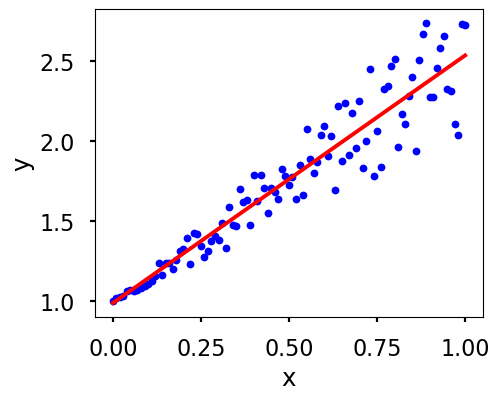

In [19]:
y_reg = np.dot(A, alpha)

plt.figure(figsize = (5,4))
plt.plot(x, y, "b.")
plt.plot(x, y_reg, "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

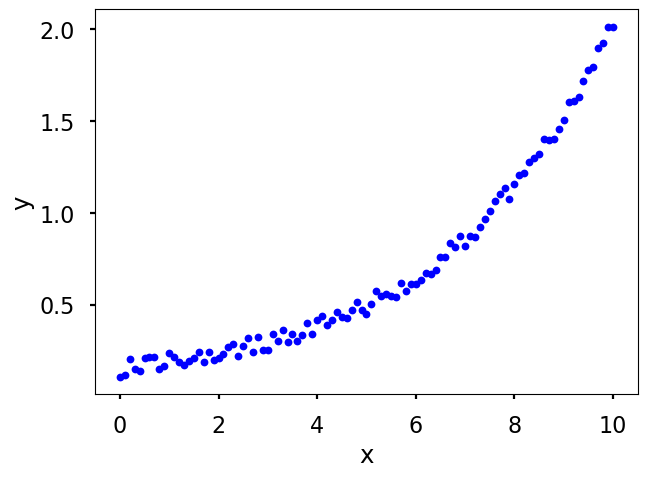

In [34]:
import numpy as np
from scipy import optimize

x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

plt.figure(figsize = (7,5))
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [25]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f"alpha = {alpha}, beta = {beta}")

alpha = 0.13870825472589884, beta = 0.26325775454718425


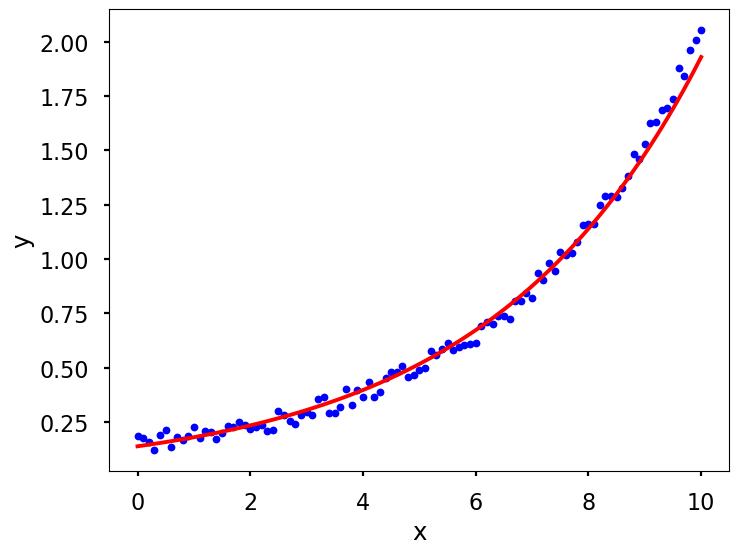

In [27]:
plt.figure(figsize = (8,6))
plt.plot(x,y,"b.")
plt.plot(x,alpha*np.exp(beta*x),"r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

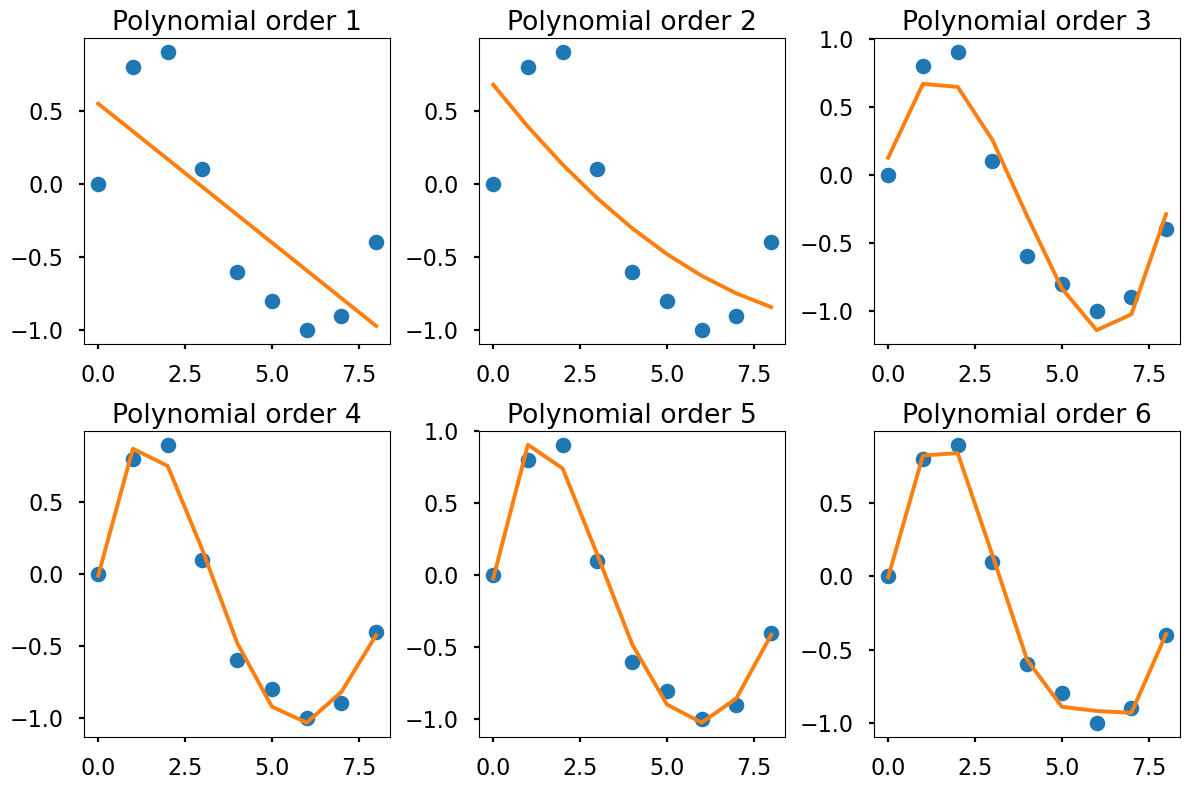

In [32]:
x_d = np.array([0,1,2,3,4,5,6,7,8])
y_d = np.array([0,0.8,0.9,0.1,-0.6,-0.8,-1,-0.9,-0.4])

plt.figure(figsize = (12,8))
for i in range(1,7):
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, "o")
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f"Polynomial order {i}")
plt.tight_layout()
plt.show()

In [39]:
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata=x,ydata=y)[0]
print(f"alpha={alpha} beta={beta}")

alpha=0.1239694011365511 beta=0.2790576445378987


In [82]:
# problem 2
import numpy as np
import scipy.optimize as optimize

def my_ls_params(f, x, y):
    m = len(f)
    n = len(x)
    A = np.zeros((n,m))
    
    for i in range(m):
        for j in range(n):
            A[j,i] = f[i](x[j])
            
    beta = np.linalg.lstsq(A,y, rcond = None)[0]
    
    return beta

In [83]:
# problem 3

def const(x):
    return 1

def identity(x):
    return x

def my_func_fit(x,y):
    f = [const, identity]
    b = my_ls_params(f,np.log(x),np.log(y))
    
    alpha = np.exp(b[0])
    beta = b[1]
    
    print("{:.6f}\n{:.6f}".format(alpha,beta))
    
    
x = np.array([1,2,3])
y = x
my_func_fit(x,y)

1.000000
1.000000


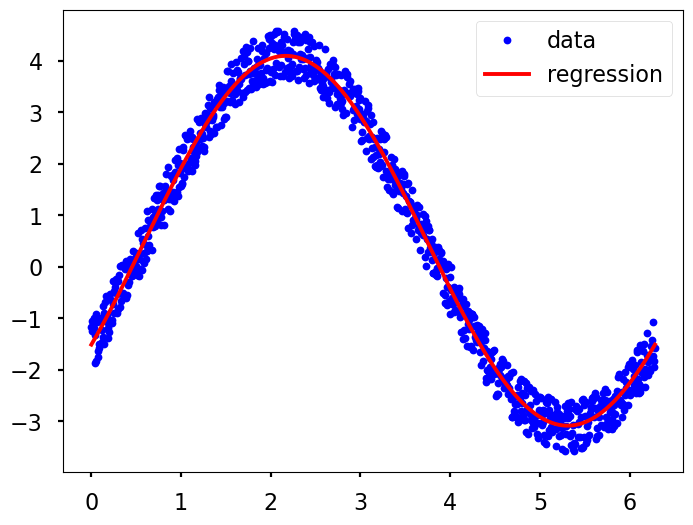

In [85]:
# problem 5

x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x)-2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos, const]
beta = my_ls_params(f,x,y)


plt.figure(figsize = (8,6))
plt.plot(x,y,"b.", label = "data")
plt.plot(x,beta[0]*f[0](x)+beta[1]*f[1](x)+beta[2]*f[2](x), "r", label="regression")
plt.legend()
plt.show()

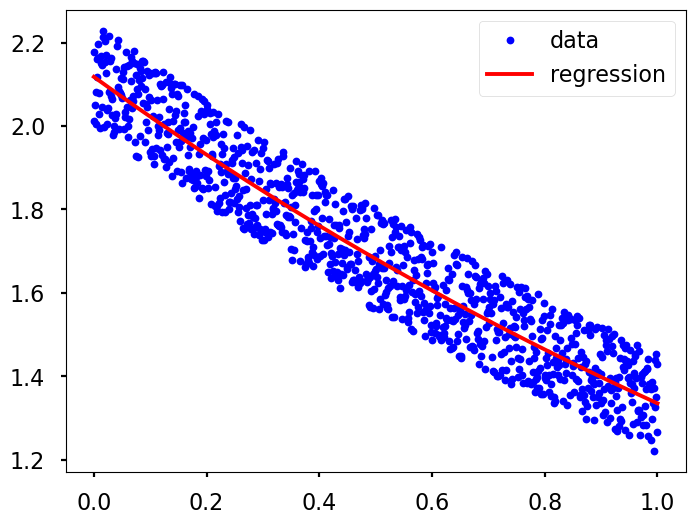

In [87]:
# problem 6

x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))
f = [const, identity]
b = my_ls_params(f,x,np.log(y))

alpha = np.exp(b[0])
beta = b[1]

plt.figure(figsize = (8,6))
plt.plot(x,y,"b.", label = "data")
plt.plot(x,alpha*np.exp(beta*x), "r", label="regression")
plt.legend()
plt.show()